In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns

In [53]:
df = pd.read_csv("MANU_10_years.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,14.18,14.40,13.84,14.36,13.312017,47800
1,2013-01-03,14.20,14.60,14.02,14.24,13.200775,73700
2,2013-01-04,14.25,14.50,14.09,14.49,13.432532,15600
3,2013-01-07,14.60,14.65,13.98,14.03,13.006103,65300
4,2013-01-08,14.08,14.25,13.99,14.14,13.108074,458300


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2632 non-null   object 
 1   Open       2632 non-null   float64
 2   High       2632 non-null   float64
 3   Low        2632 non-null   float64
 4   Close      2632 non-null   float64
 5   Adj Close  2632 non-null   float64
 6   Volume     2632 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 144.1+ KB


In [55]:
type(df)

pandas.core.frame.DataFrame

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,14.18,14.40,13.84,14.36,13.312017,47800
2013-01-03,14.20,14.60,14.02,14.24,13.200775,73700
2013-01-04,14.25,14.50,14.09,14.49,13.432532,15600
2013-01-07,14.60,14.65,13.98,14.03,13.006103,65300
2013-01-08,14.08,14.25,13.99,14.14,13.108074,458300


In [57]:
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

## Univariate analysis

In [58]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2.632000e+03
mean,17.087527,17.327971,16.846657,17.075559,16.322228,2.647798e+05
std,2.455726,2.522442,2.405400,2.461324,2.423461,1.013876e+06
min,10.480000,10.660000,10.410000,10.510000,10.510000,0.000000e+00
25%,15.700000,15.870000,15.497500,15.650000,14.813660,2.890000e+04
50%,16.790001,17.000000,16.570000,16.795000,15.854506,6.145000e+04
75%,18.360001,18.642499,18.112501,18.362501,17.401546,2.043500e+05
max,27.000000,27.700001,26.000000,26.840000,26.840000,3.522620e+07


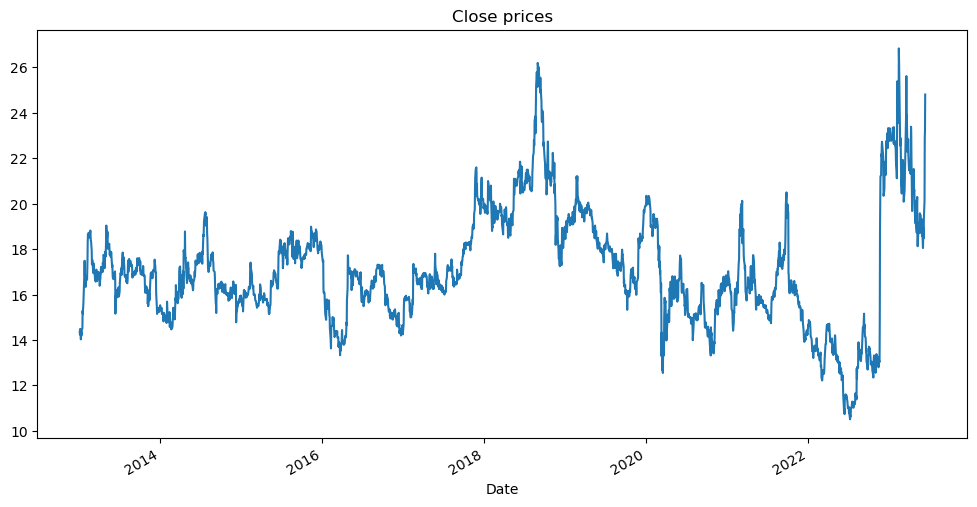

In [59]:
df['Close'].plot(figsize = (12,6))
plt.title('Close prices')
plt.show()

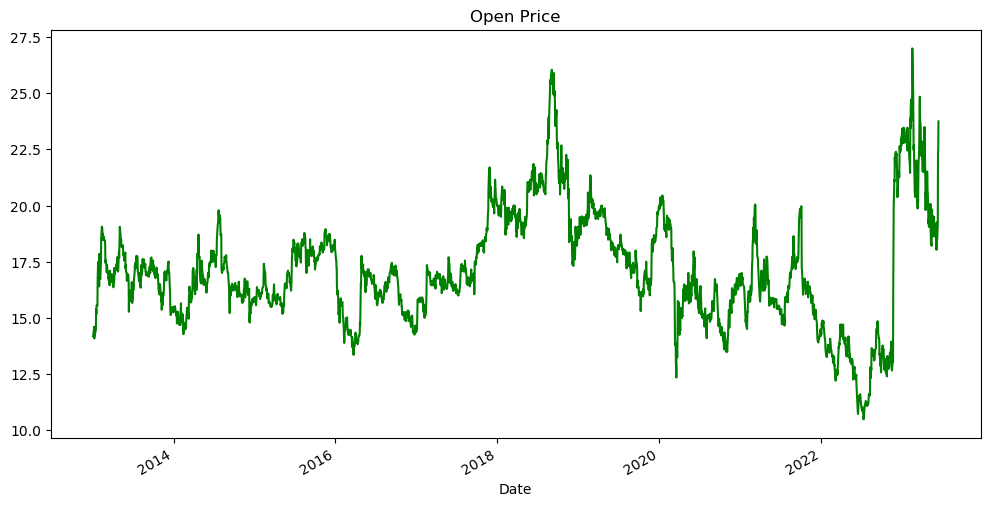

In [60]:
df['Open'].plot(figsize = (12,6), c = 'green')
plt.title('Open Price')
plt.show()

In [9]:
df['Return'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2013-01-02,14.18,14.40,13.84,14.36,13.312017,47800,NaN
2013-01-03,14.20,14.60,14.02,14.24,13.200775,73700,-0.008357
2013-01-04,14.25,14.50,14.09,14.49,13.432532,15600,0.017556
2013-01-07,14.60,14.65,13.98,14.03,13.006103,65300,-0.031746
2013-01-08,14.08,14.25,13.99,14.14,13.108074,458300,0.007840


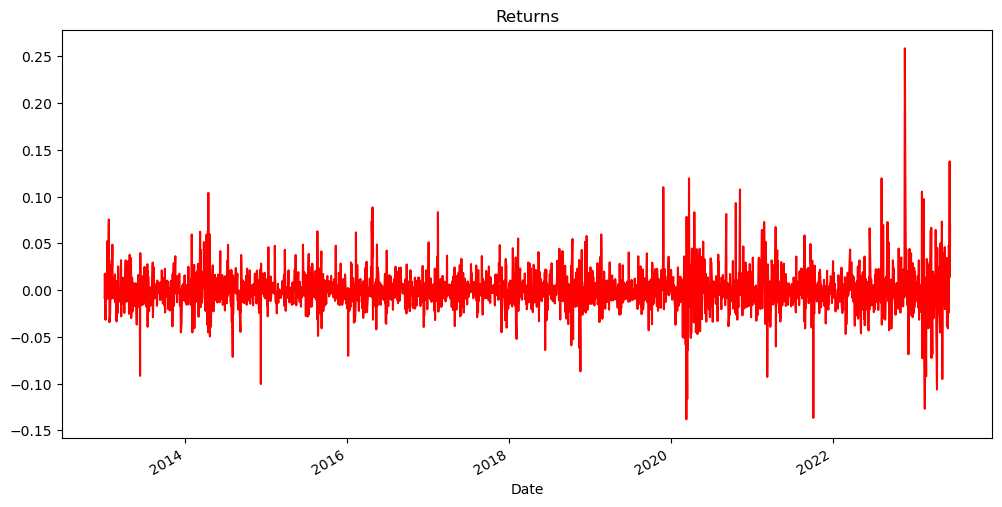

In [18]:
df['Return'].plot(figsize = (12,6),c = 'red')
plt.title('Returns')
plt.show()

Returns in finance refer to the percentage change in the value of an asset or investment over a specific period. By plotting the returns, we can observe the fluctuation and volatility in the asset's performance and gain insights into its historical performance.

By interpreting the graph, we can assess the historical performance of the asset, identify periods of volatility or stability, detect trends, and make informed decisions about the asset's future prospects. Remember that additional analysis, such as calculating statistical measures or comparing the returns to a benchmark or market index, can provide further insights into the asset's performance and risk characteristics. Larger peaks or troughs in the returns indicate periods of higher volatility or significant changes in the asset's value. These fluctuations reflect the market conditions and the asset's performance over time. Higher volatility suggests greater price variability, while lower volatility indicates relative stability.

Here we can see several larger peaks and troughs which suggests higher volatilty of the stock specially after 2022 to till now.

C:\Users\nandy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

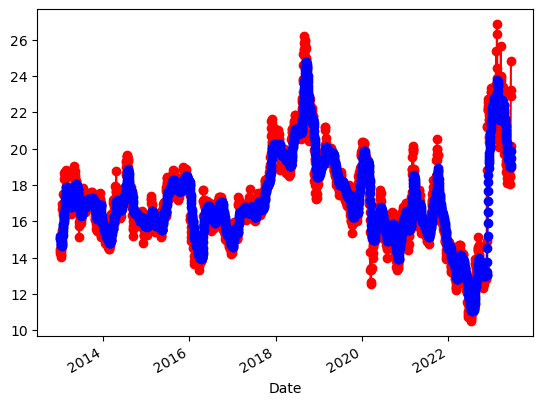

In [62]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
Exp_Smooth = SimpleExpSmoothing(df['Close']).fit(smoothing_level = 0.1, optimized = True)
df['Close'].plot(marker = 'o', color = 'red')
Exp_Smooth.fittedvalues.plot(marker = 'o', color = 'blue')

The red markers represent the original data points from the 'Close' column of the dataframe (df). Each marker represents the observed value at a specific time point. The blue markers represent the values predicted by the Simple ExpSmoothing model. These values are generated based on the model's fit to the historical data. By comparing the red markers (i.e. original data) and the blue markers (i.e. fitted values), I can assess how well the model captures the underlying trend and pattern of the data. If the fitted values closely follow the original data, it suggests that the model is successfully capturing the trend and pattern. Conversely, if there are noticeable differences or deviations between the fitted values and the original data, it indicates that the model may not accurately capture the underlying behavior.
Here we can see that the data is being captured by the Exp_Smooth model well except in 2019 and 2023 where two spikes occured but the model detected an upward trend there as well though it could not capture that fully.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

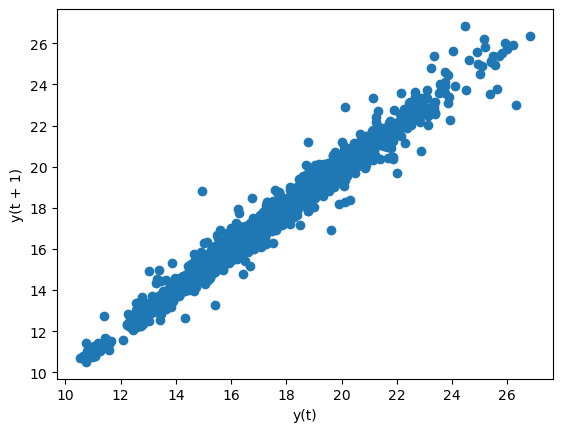

In [63]:
from pandas.plotting import lag_plot
lag_plot(df['Close'])

In a time series, lag plot indicates how current values are related to previous values. By plotting a lag plot, we can visualize the relationship between each data point and its lagged version.

The purpose of applying a lag plot is to detect patterns of autocorrelation in the time series. If the data points in the plot form a relatively tight cluster around a diagonal line, it suggests a positive autocorrelation, indicating that the values are influenced by their previous values. On the other hand, if the data points are scattered without any clear pattern, it suggests little or no autocorrelation.

By examining the resulting lag plot, we can gain insights into the temporal dependence and potential autocorrelation structure in the 'Close' time series data. This information can be valuable for selecting appropriate models and techniques for time series analysis and forecasting.

We can see that the lag plot of our data shows linearity which is going diagonally from bottom-left to top-right, then we can say that it is showing a positive autocorrelation. Again, the points are tightly clustered around the diagonal line, it indicates a strong and consistent relationship between each observation and its lagged version.

<AxesSubplot:xlabel='Date'>

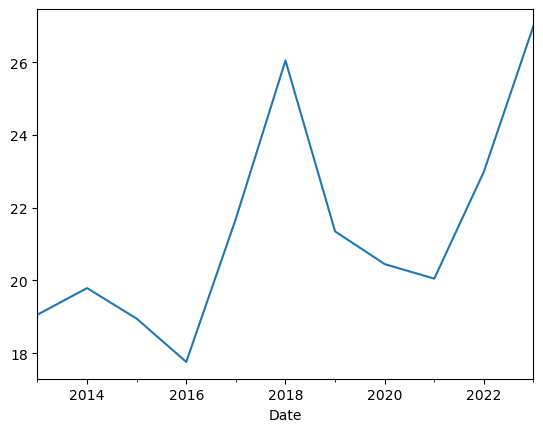

In [64]:
df.resample(rule = 'A').max()['Open'].plot()

Above resampled the data to see the annual closing trend of Open price and below saw the quarterly trend.

<AxesSubplot:xlabel='Date'>

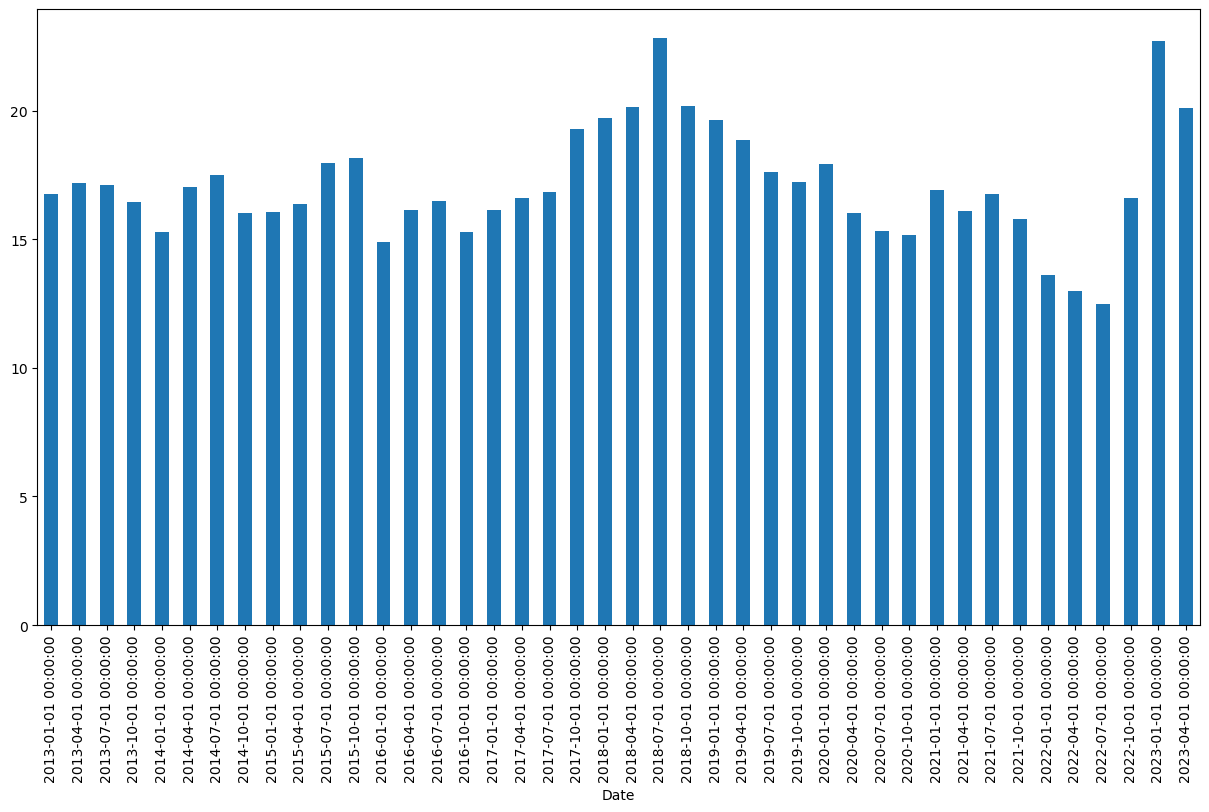

In [65]:
df['Open'].resample(rule = 'QS').mean().plot(kind = 'bar', figsize = (15,8))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

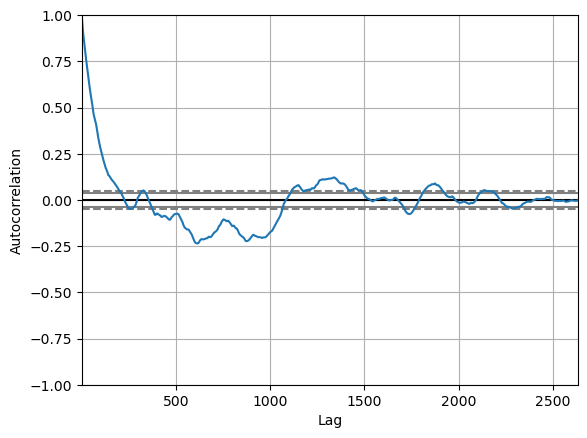

In [66]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])

By examining the autocorrelation plot, we can gain insights into the autocorrelation patterns in the 'Close' time series data. Peaks or valleys above or below the significance thresholds may suggest significant positive or negative autocorrelation at specific lags. Lack of significant autocorrelation patterns indicates the absence of strong dependencies between the current value and its previous values.

The autocorrelation plot can help understand the appropriate lag values to consider when modeling the time series data or selecting appropriate forecasting techniques.

Here we can see some important correlation patterns which are outside the significance thresholds.

## Multivariate analysis

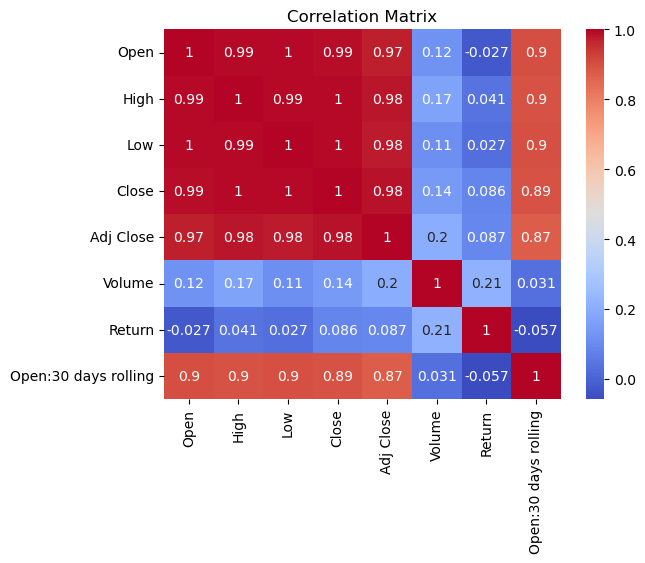

In [51]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see strong correlation between othere features except Volume and Return with other features.

In [32]:
df.resample(rule = 'A').min()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2013-12-31,14.080000,14.25,13.84,14.030000,13.006103,1600,-0.091672
2014-12-31,14.270000,14.59,14.26,14.470000,13.413992,3000,-0.100426
2015-12-31,15.180000,15.38,15.00,15.150000,14.044364,7000,-0.049014
2016-12-31,13.350000,13.66,13.30,13.330000,12.457199,9700,-0.070286
2017-12-31,14.450000,14.70,14.30,14.700000,13.855105,7100,-0.045049
2018-12-31,17.309999,17.59,16.91,17.250000,16.572750,2900,-0.086848
2019-12-31,15.300000,15.78,15.30,15.330000,14.795554,0,-0.042923
2020-12-31,12.340000,13.12,12.06,12.550000,12.177945,20300,-0.138132
2021-12-31,13.900000,14.02,13.75,13.920000,13.820414,49400,-0.136595


In [67]:
df.resample(rule = 'QS').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,14.080000,14.250000,13.840000,14.030000,13.006103,11700
2013-04-01,15.270000,15.990000,14.870000,15.160000,14.053635,5800
2013-07-01,15.930000,16.340000,15.910000,16.129999,14.952846,2400
2013-10-01,15.120000,15.290000,15.010000,15.150000,14.044364,1600
2014-01-01,14.270000,14.590000,14.260000,14.470000,13.413992,10800
2014-04-01,16.049999,16.139999,15.820000,15.860000,14.702548,3000
2014-07-01,15.210000,15.750000,14.950000,15.190000,14.081447,9300
2014-10-01,14.790000,15.140000,14.720000,14.780000,13.701365,21300
2015-01-01,15.490000,15.520000,15.150000,15.260000,14.146338,19000


In [38]:
df['High'].rolling(30).mean()

Date
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-07          NaN
2013-01-08          NaN
                ...    
2023-06-09    19.616667
2023-06-12    19.582667
2023-06-13    19.704000
2023-06-14    19.842000
2023-06-15    20.047333
Name: High, Length: 2632, dtype: float64

In [39]:
df['Open:30 days rolling'] = df['Open'].rolling(30).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Open:30 days rolling
Date,,,,,,,,
2023-06-09,18.50,19.680000,18.500000,19.360001,19.360001,1630400,0.047619,19.092333
2023-06-12,19.16,20.230000,18.799999,20.129999,20.129999,1878500,0.039773,19.047667
2023-06-13,22.33,23.170000,21.590000,22.900000,22.900000,9670300,0.137606,19.152000
2023-06-14,22.50,23.790001,22.350000,23.219999,23.219999,2833200,0.013974,19.255333
2023-06-15,23.75,26.639999,22.959999,24.809999,24.809999,12164600,0.068475,19.412000


<AxesSubplot:xlabel='Date'>

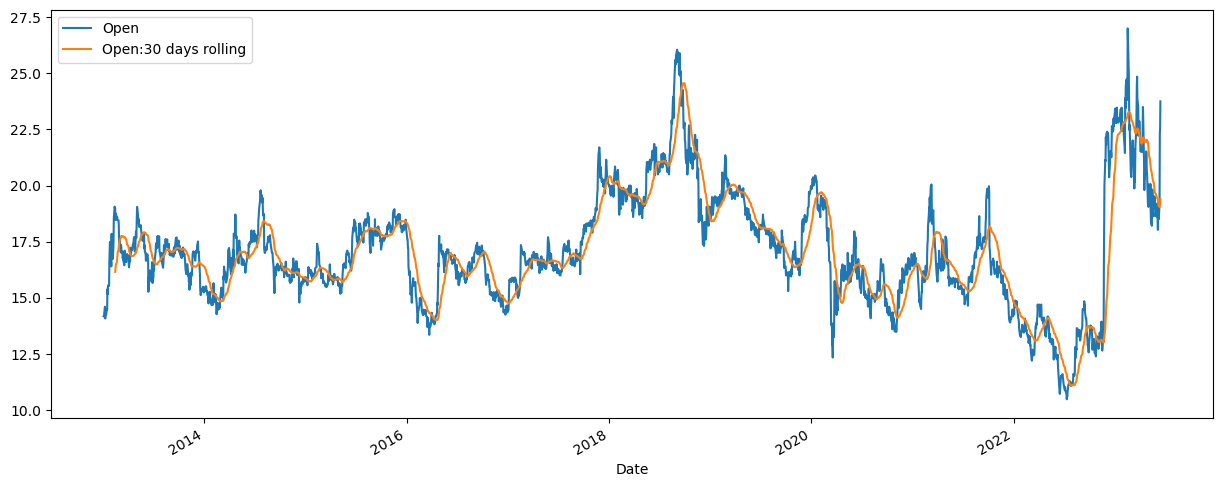

In [40]:
df[['Open', 'Open:30 days rolling']].plot(figsize = (15,6))

The rolling mean, also known as the moving average, is a statistical technique commonly used in time series analysis to smooth out fluctuations and highlight trends over a specified window of observations. The rolling mean helps to smooth out short-term fluctuations or noise in the data and provide a clearer view of the underlying trends. By taking an average over a specific window, the rolling mean reduces the impact of individual outliers or extreme values, making it easier to identify long-term patterns or changes in the data. It can be useful for visualization, trend analysis, and further modeling or analysis tasks in time series analysis.

We can compare the rolling mean line with the original 'High' data. If the rolling mean line follows the general movement and trends of the original data, it suggests that the rolling mean effectively captures the underlying behavior of the 'High' column. If there are significant divergences or discrepancies between the rolling mean and the original data, it indicates potential changes in trends or patterns.

Here the rolling mean effectively captured the underlying behaviour of the data.